In [19]:
import matplotlib.pyplot as plt 
import pandas as pd
import pyodbc
import seaborn as sns

In [20]:
server = 'DESKTOP-T4M784R\SQLEXPRESS' 
database = 'fifa' 
username = 'sa' 
password = 'Dj0nat2n'  

In [21]:
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

In [90]:
query = """ SELECT
      pl.short_name
      ,info.[age]
       ,info.[player_positions]
       ,league.[league_name]
       ,league.[league_level]
      ,info.[year]
      ,info.[overall]
      ,info.[potential]
      ,info.[value_eur]
      ,info.[wage_eur]
      ,info.[club_team_id]
      ,info.[club_position]
      ,info.[club_joined]
      ,info.[weak_foot]
      ,info.[skill_moves]
      ,info.[international_reputation]
      ,info.[work_rate]
      ,info.[body_type]
      ,info.[player_tags]
      ,info.[player_traits]
      ,info.[pace]
      ,info.[shooting]
      ,info.[passing]
      ,info.[dribbling]
      ,info.[defending]
      ,info.[physic]
      ,info.[attacking_crossing]
      ,info.[attacking_finishing]
      ,info.[attacking_heading_accuracy]
      ,info.[attacking_short_passing]
      ,info.[attacking_volleys]
      ,info.[skill_dribbling]
      ,info.[skill_curve]
      ,info.[skill_fk_accuracy]
      ,info.[skill_long_passing]
      ,info.[skill_ball_control]
      ,info.[movement_acceleration]
      ,info.[movement_sprint_speed]
      ,info.[movement_agility]
      ,info.[movement_reactions]
      ,info.[movement_balance]
      ,info.[power_shot_power]
      ,info.[power_jumping]
      ,info.[power_stamina]
      ,info.[power_strength]
      ,info.[power_long_shots]
      ,info.[mentality_aggression]
      ,info.[mentality_interceptions]
      ,info.[mentality_positioning]
      ,info.[mentality_vision]
      ,info.[mentality_penalties]
      ,info.[mentality_composure]
      ,info.[defending_marking_awareness]
      ,info.[defending_standing_tackle]
      ,info.[defending_sliding_tackle]
      ,info.[goalkeeping_diving]
      ,info.[goalkeeping_handling]
      ,info.[goalkeeping_kicking]
      ,info.[goalkeeping_positioning]
      ,info.[goalkeeping_reflexes]
      ,info.[goalkeeping_speed]
      ,info.[ls]
      ,info.[st]
      ,info.[rs]
      ,info.[lw]
      ,info.[lf]
      ,info.[cf]
      ,info.[rf]
      ,info.[rw]
      ,info.[lam]
      ,info.[cam]
      ,info.[ram]
      ,info.[lm]
      ,info.[lcm]
      ,info.[cm]
      ,info.[rcm]
      ,info.[rm]
      ,info.[lwb]
      ,info.[ldm]
      ,info.[cdm]
      ,info.[rdm]
      ,info.[rwb]
      ,info.[lb]
      ,info.[lcb]
      ,info.[cb]
      ,info.[rcb]
      ,info.[rb]
      ,info.[gk]
  FROM [fifa].[dbo].[player_info_stats]  info
  left join [fifa].[dbo].[player] pl 
  on pl.sofifa_id = info.sofifa_id
  left join [fifa].[dbo].[club] club
  on club.club_team_id = info.club_team_id
  left join [fifa].[dbo].[league] league
  on club.league_id = league.league_id
  where info.year = 2022
 """

In [91]:
df = pd.read_sql(query, cnxn)

In [92]:
df.shape

(19239, 88)

In [1]:
sns.histplot(data = df[df.wage_eur >= 50000], x= 'wage_eur',kde = True)

NameError: name 'sns' is not defined

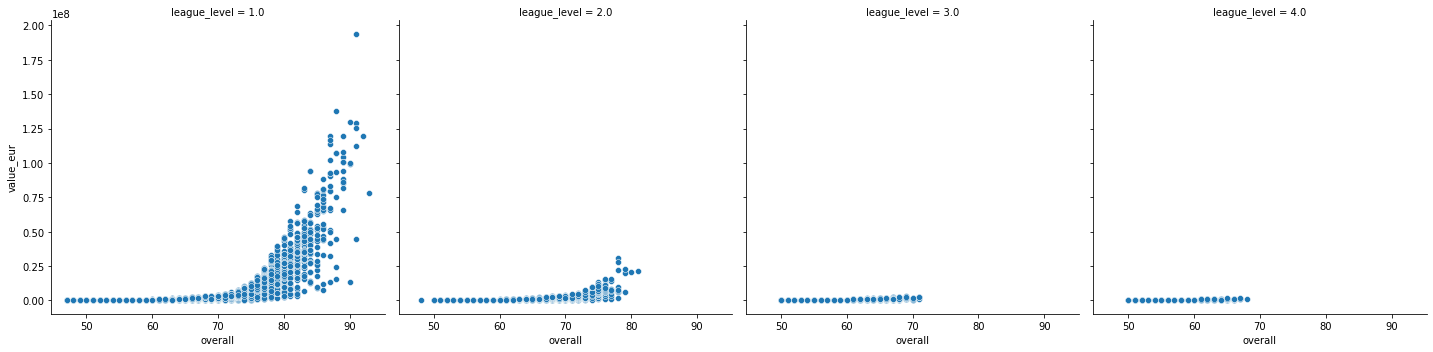

In [94]:
sns.relplot(x='overall',y='value_eur', palette = 'viridis',data=df, col = df.league_level)


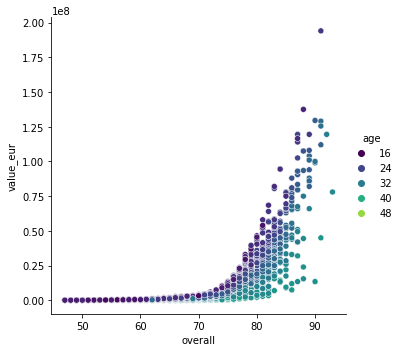

In [95]:
sns.relplot(x='overall',y='value_eur', palette = 'viridis',data=df, hue = df.age)

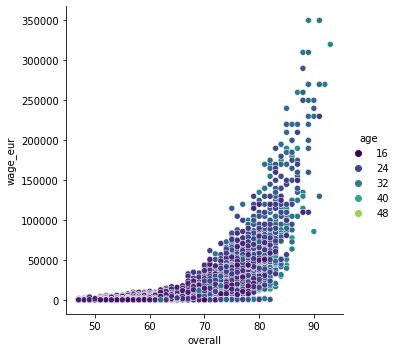

In [100]:
sns.relplot(x='overall',y='wage_eur', palette = 'viridis',data=df, hue = df.age)

C:\Users\djony\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


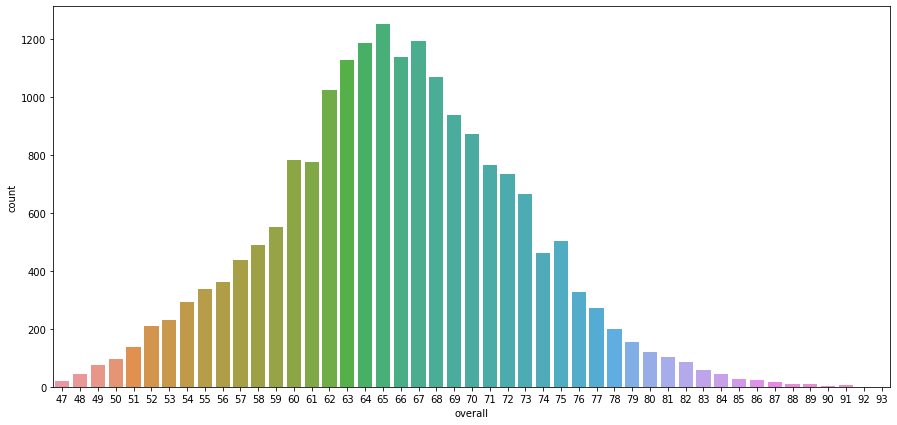

In [102]:
plt.figure(figsize=(15,7))
sns.countplot(df['overall'])
plt.show()

**Most Paid**

In [104]:
player_salary = df[["short_name", "wage_eur"]].sort_values(by="wage_eur", ascending=False).reset_index(drop=True)
player_salary[:10]

,short_name,wage_eur
0,K. De Bruyne,350000.0
1,K. Benzema,350000.0
2,L. Messi,320000.0
3,T. Kroos,310000.0
4,Casemiro,310000.0
5,R. Sterling,290000.0
6,M. Salah,270000.0
7,S. Mané,270000.0
8,R. Lewandowski,270000.0
9,Neymar Jr,270000.0
